In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc as pm


In [14]:
data = pd.read_csv('/content/drive/MyDrive/per_game_data.csv')
data.head()
col_names = data.columns
col_names = list(col_names)
col_names

['Unnamed: 0',
 'Rk',
 'Player',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year']

<Axes: title={'center': 'G'}, ylabel='Frequency'>

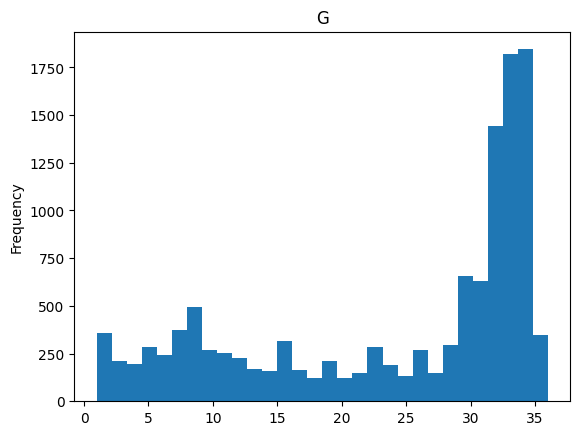

In [15]:
# Examine each variable
data['G'].plot(kind='hist', bins=30, title='G')
# Bimodal, left-skewed

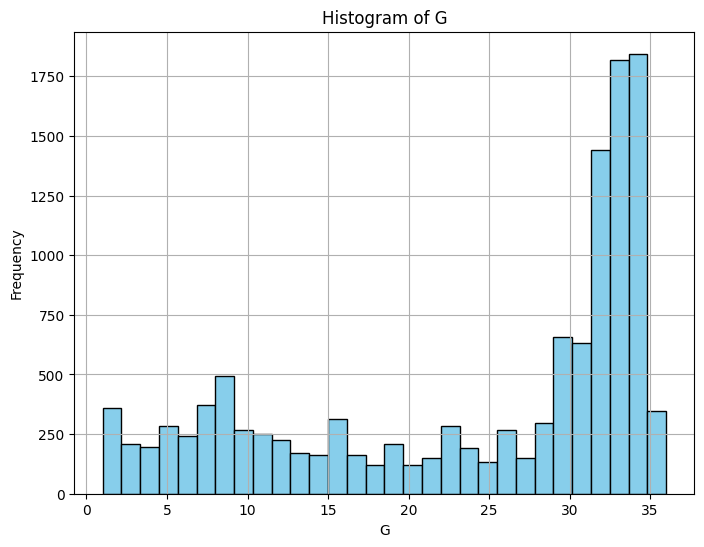

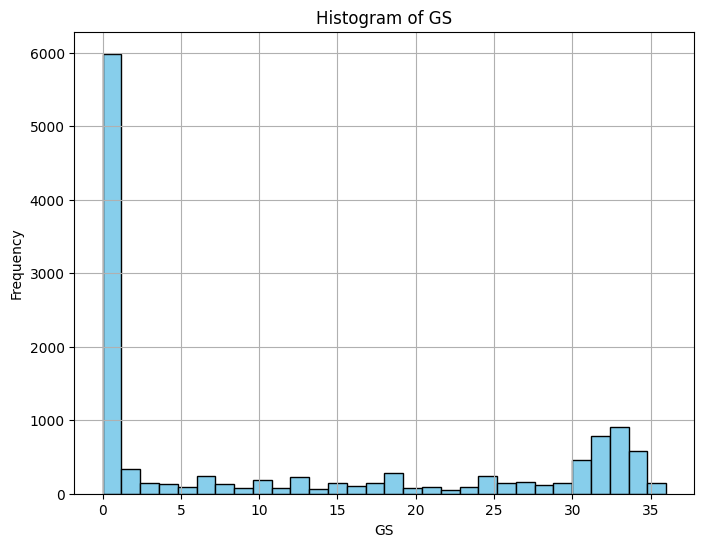

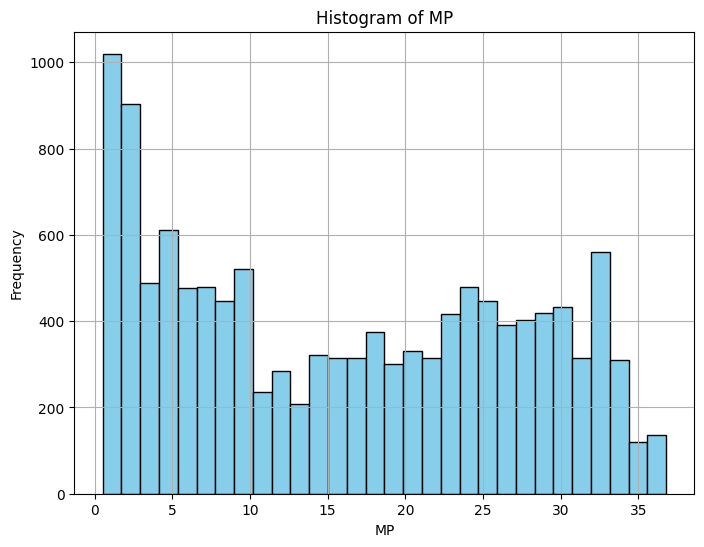

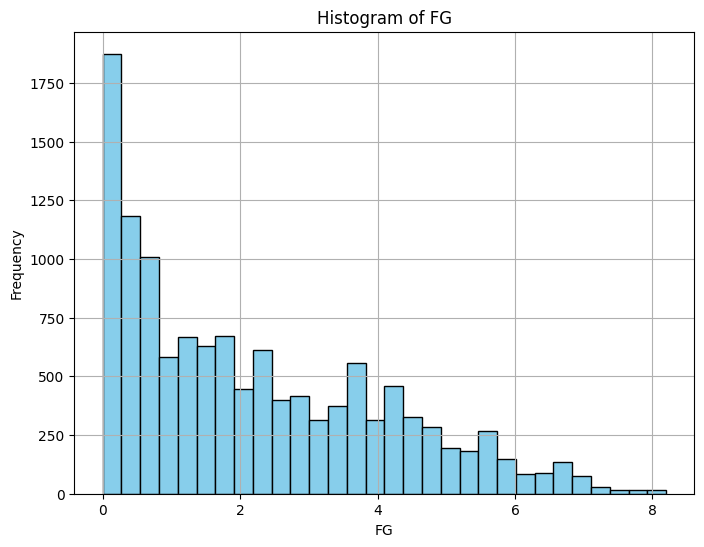

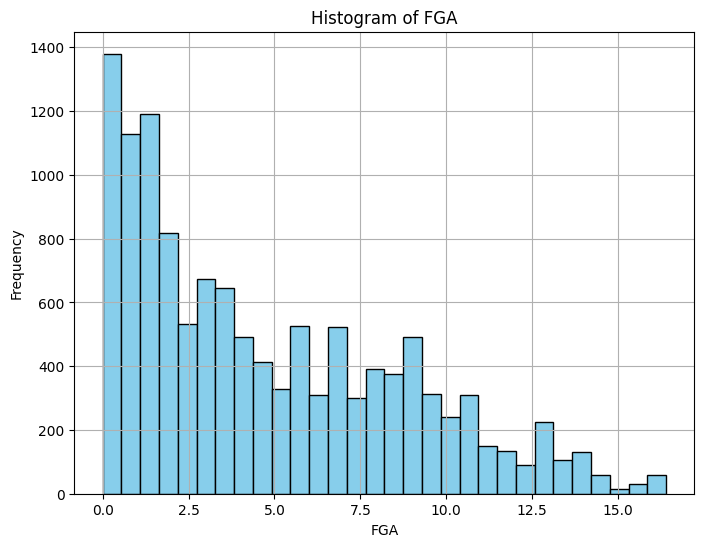

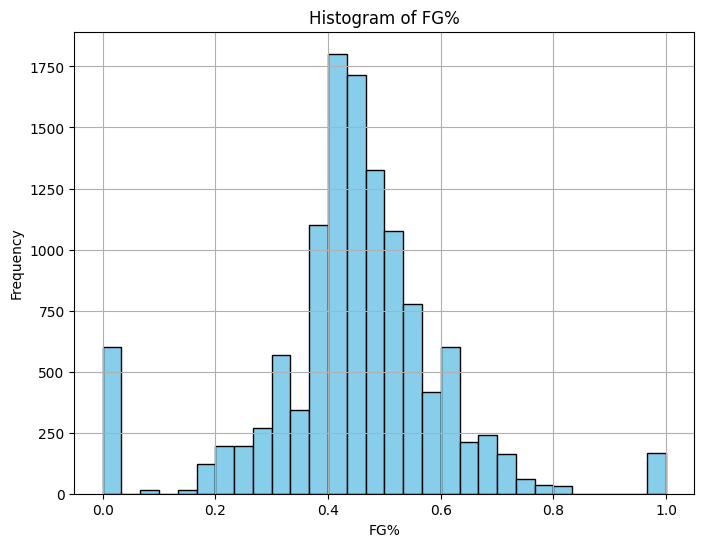

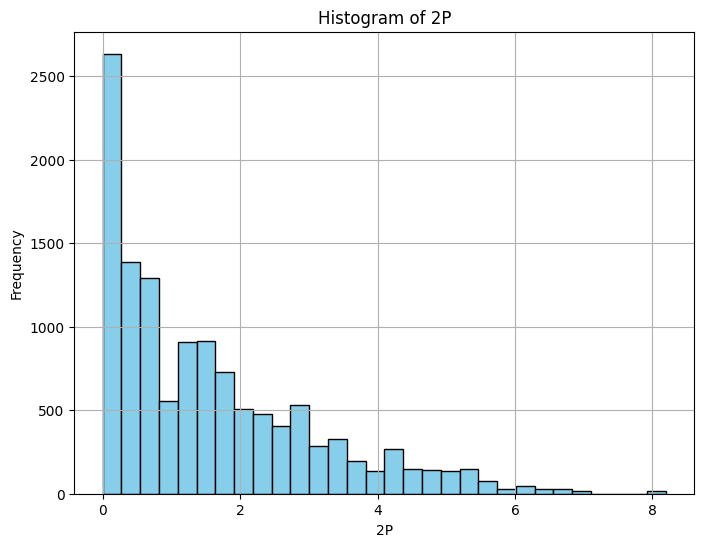

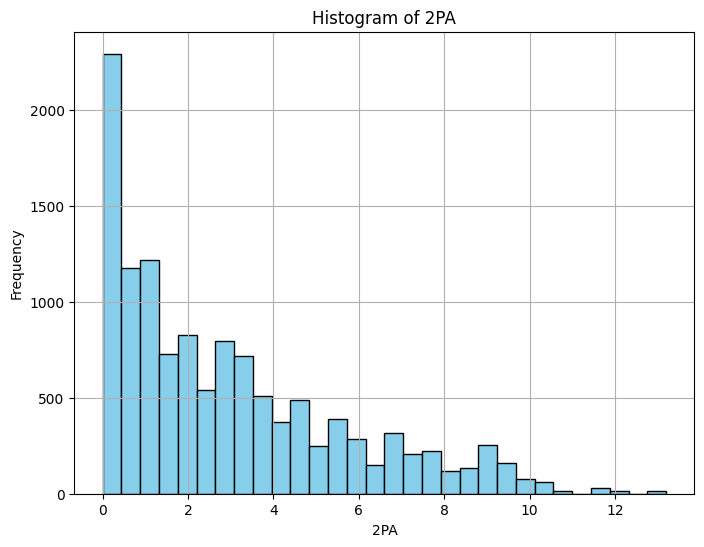

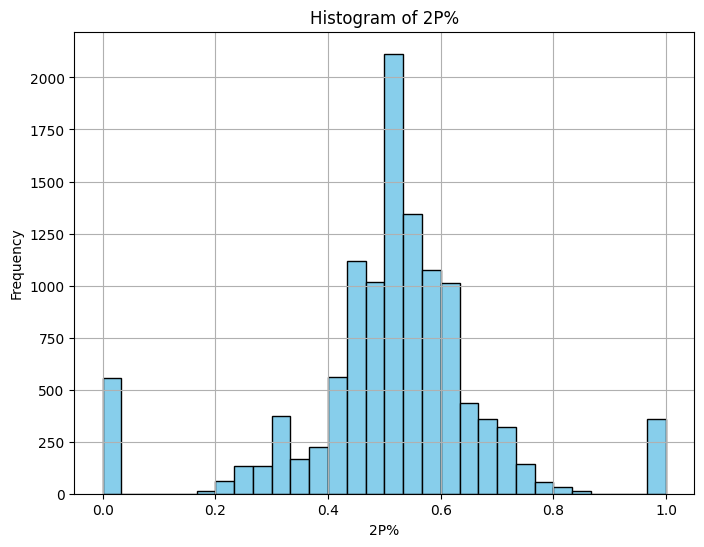

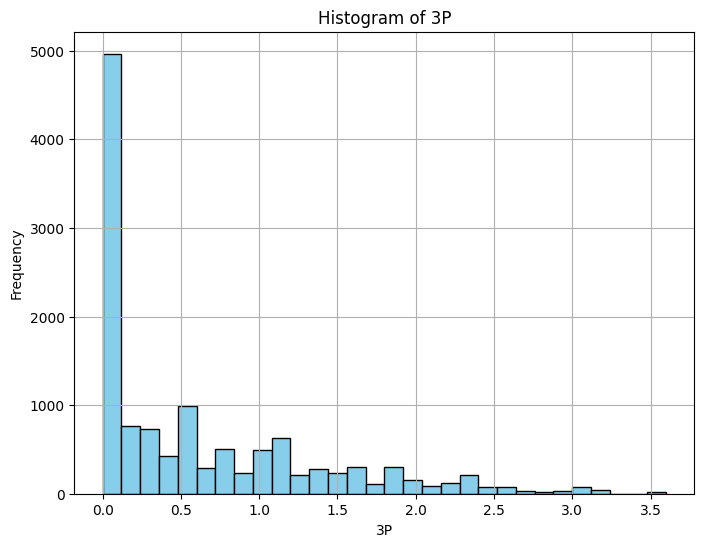

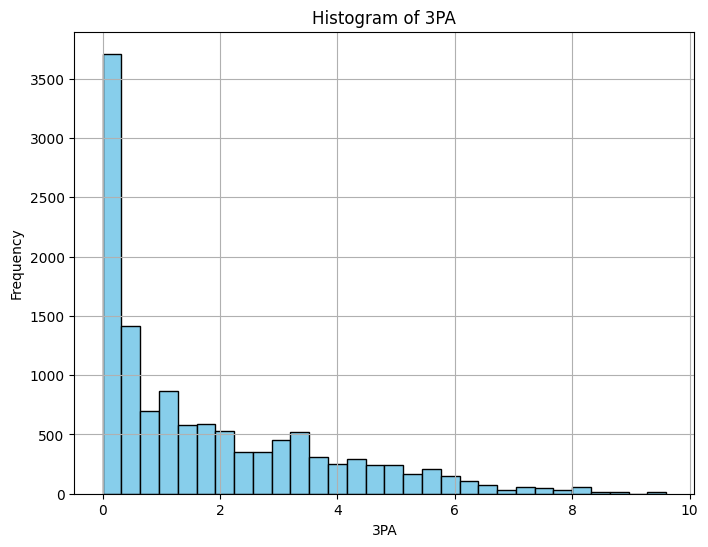

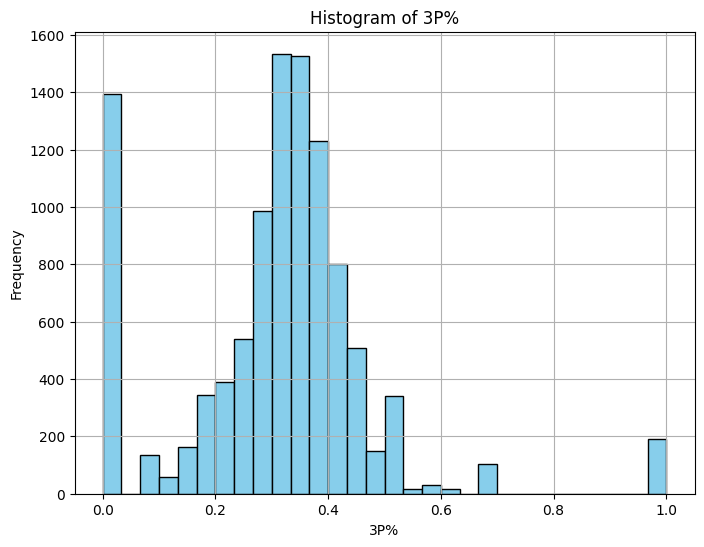

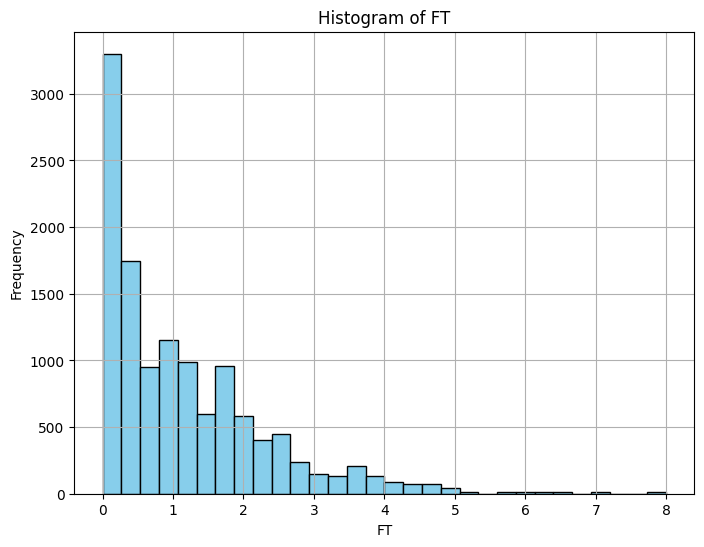

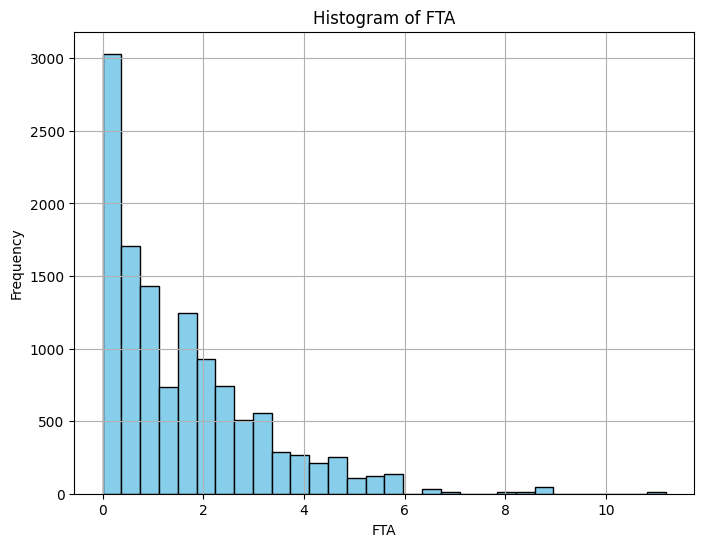

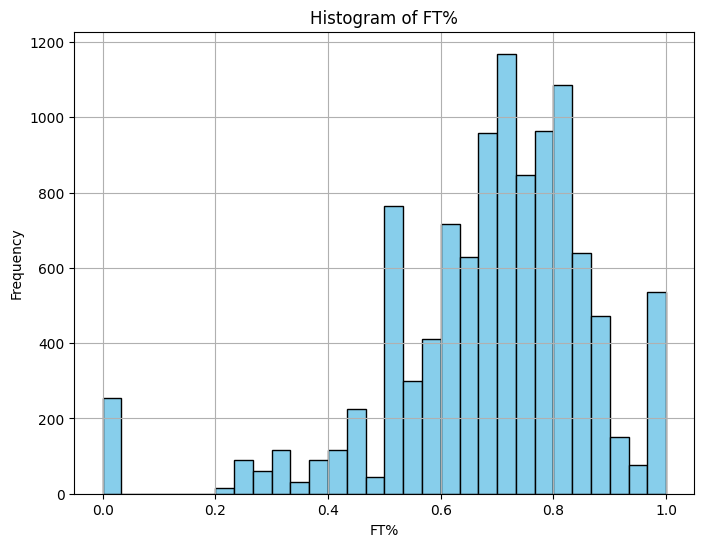

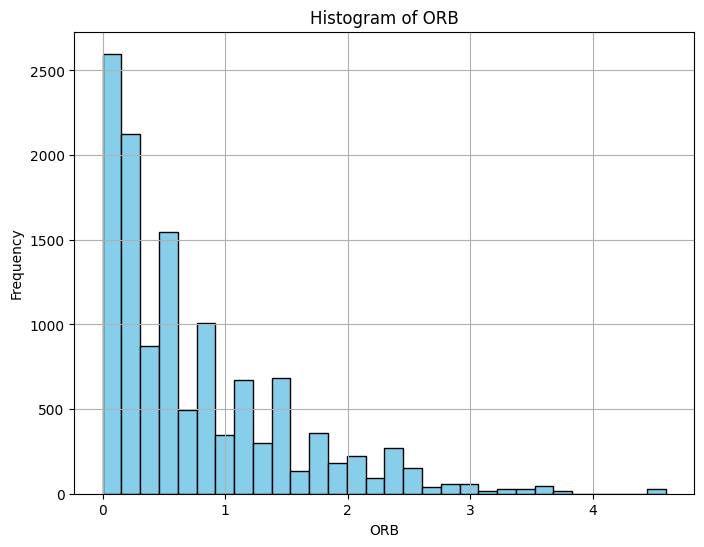

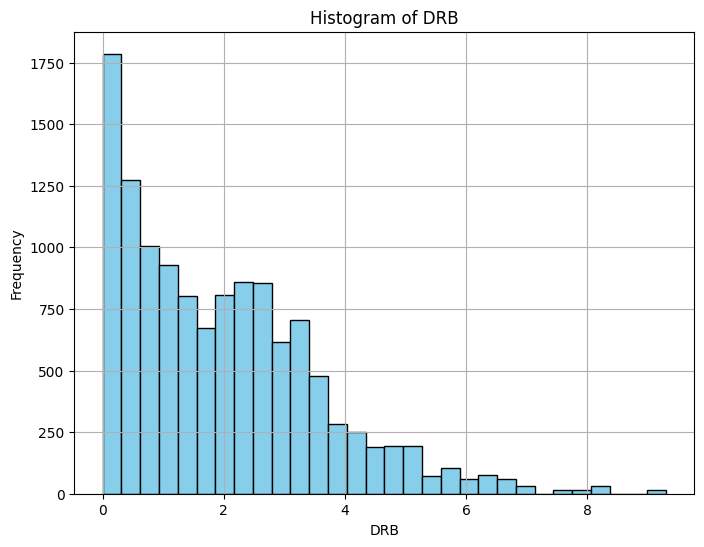

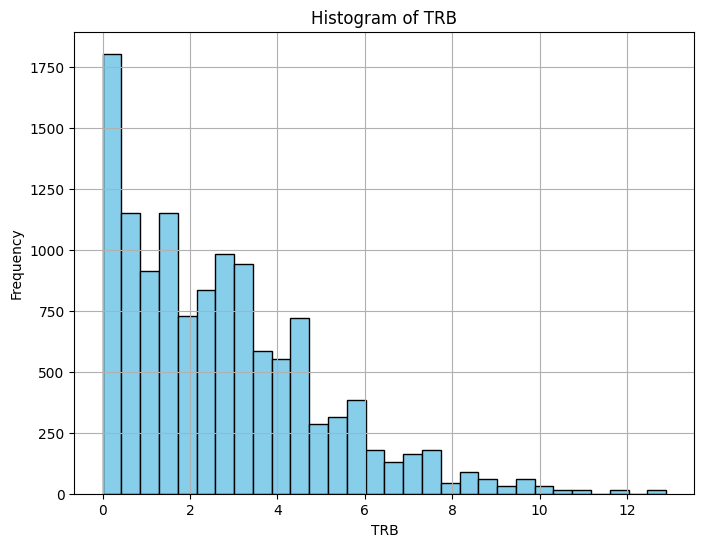

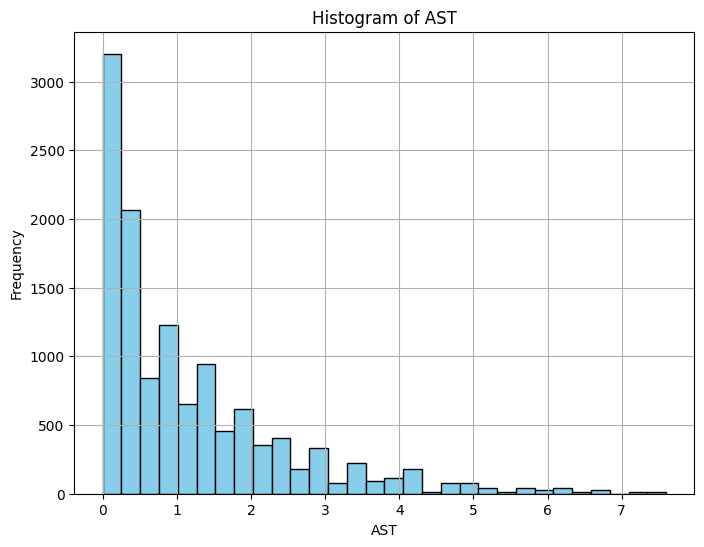

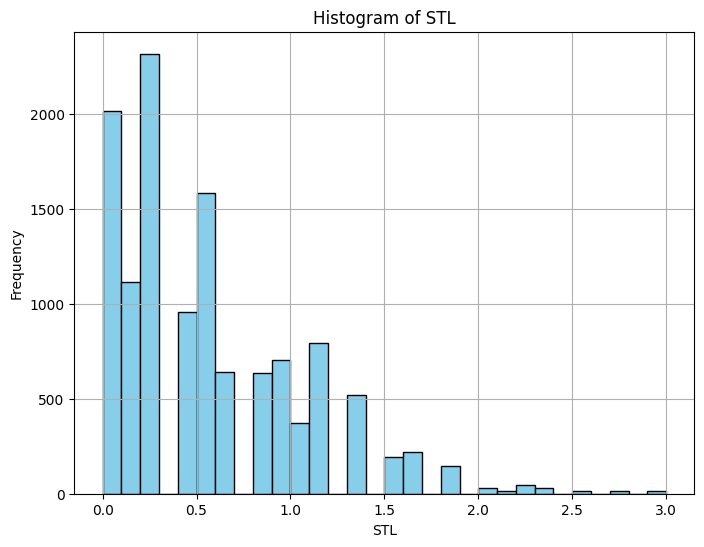

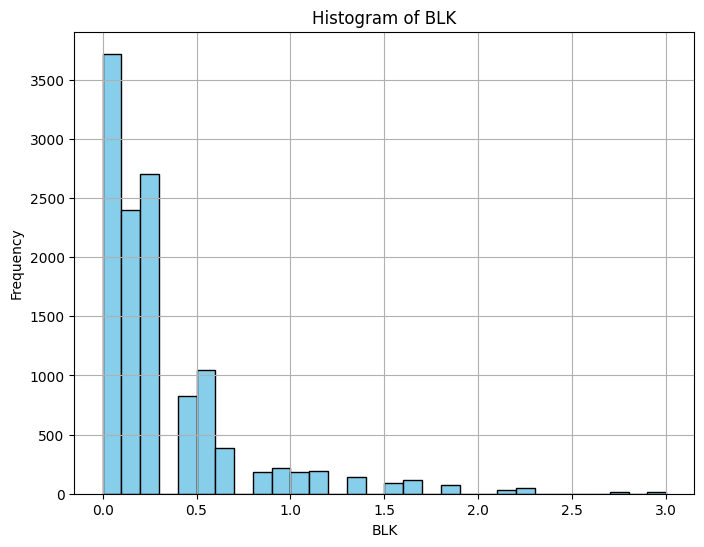

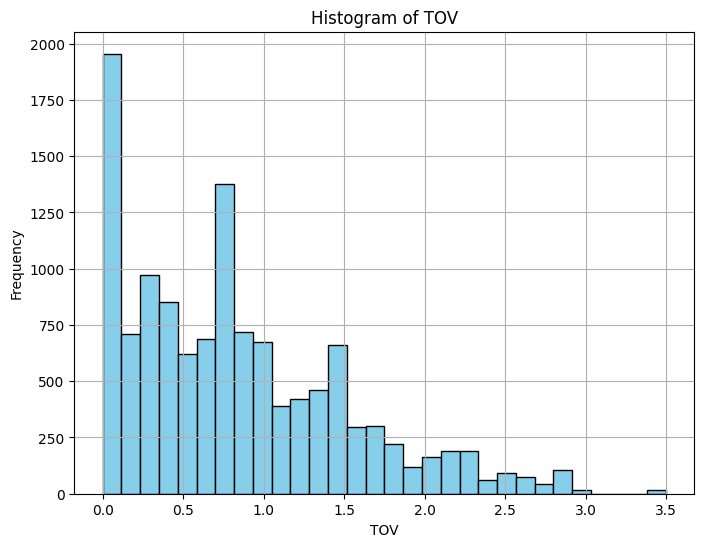

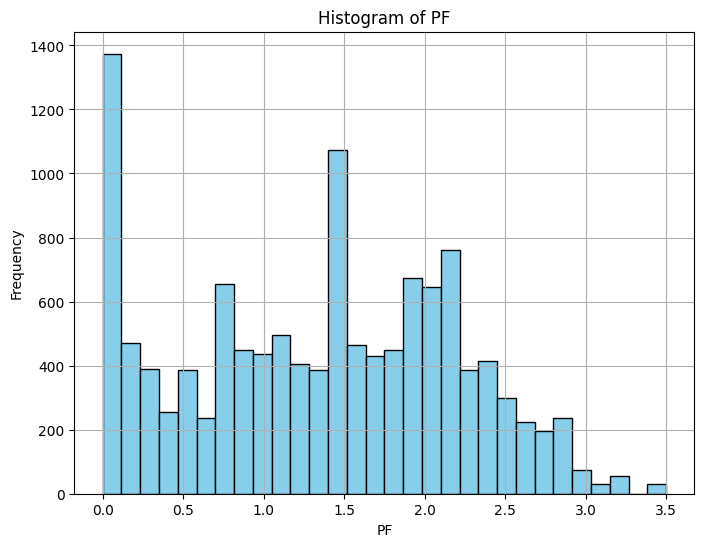

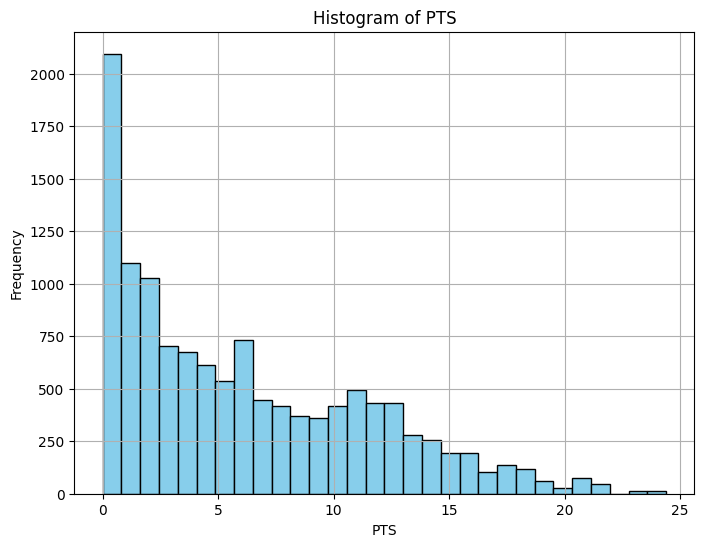

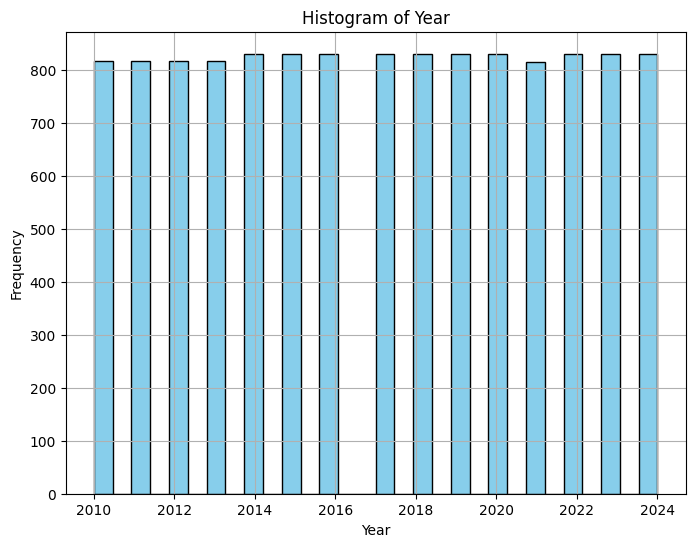

In [16]:
# Examine each variable

def plot_histograms(col_names):
    for column in col_names:
        plt.figure(figsize=(8, 6))
        plt.hist(data[str(column)], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

plot_histograms(col_names[3:])


In [4]:
def describe_all(col_names):
  for column in col_names:
    print(data[str(column)].describe())

describe_all(col_names)

count    12378.000000
mean      6188.500000
std       3573.365151
min          0.000000
25%       3094.250000
50%       6188.500000
75%       9282.750000
max      12377.000000
Name: Unnamed: 0, dtype: float64
count    12378.000000
mean         7.633220
std          4.222031
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         18.000000
Name: Rk, dtype: float64
count           12378
unique            829
top       Isaac Jones
freq               30
Name: Player, dtype: object
count    12378.000000
mean        24.011553
std         11.017769
min          1.000000
25%         14.000000
50%         30.000000
75%         33.000000
max         36.000000
Name: G, dtype: float64
count    12378.000000
mean        11.852480
std         13.855289
min          0.000000
25%          0.000000
50%          2.000000
75%         28.000000
max         36.000000
Name: GS, dtype: float64
count    12378.000000
mean        16.091929
std         10.929882
min    

In [17]:
correlation = data.corr()
PTS_corr= correlation['PTS']
print(PTS_corr)

Unnamed: 0    0.000220
Rk           -0.922931
G             0.647062
GS            0.834106
MP            0.920118
FG            0.989866
FGA           0.980973
FG%           0.237113
2P            0.882998
2PA           0.910918
2P%           0.130257
3P            0.710615
3PA           0.711356
3P%           0.259315
FT            0.910708
FTA           0.889089
FT%           0.349618
ORB           0.528677
DRB           0.820472
TRB           0.767487
AST           0.694419
STL           0.725164
BLK           0.439554
TOV           0.847132
PF            0.709519
PTS           1.000000
Year          0.000211
Name: PTS, dtype: float64


<ipython-input-17-5d583f5d30e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


In [18]:
Above_point_eight = ['GS', 'MP', 'FG', 'FGA','2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'DRB', 'TOV']

In [25]:
X = data[Above_point_eight]
y = data['PTS']

with pm.Model() as MLR:
    # Need priors on each beta
    beta_gs = pm.HalfNormal('beta_gs', sigma = 50)
    beta_mp = pm.HalfNormal('beta_mp', sigma = 50)
    beta_fg = pm.HalfNormal('beta_fg', sigma = 50)
    beta_fga = pm.HalfNormal('beta_fga', sigma = 50)
    beta_2p= pm.HalfNormal('beta_2p', sigma = 50)
    beta_2pa= pm.Exponential('beta_2pa', lam = 50)
    beta_3p= pm.Exponential('beta_3p', lam = 50)
    beta_3pa= pm.Exponential('beta_3pa', lam = 50)
    beta_ft= pm.Exponential('beta_ft', lam = 50)
    beta_fta= pm.Exponential('beta_fta', lam = 50)
    beta_drb= pm.HalfNormal('beta_drb', sigma = 50)
    beta_tov= pm.HalfNormal('beta_tov', sigma = 50)

    betas = pm.math.stack([beta_gs, beta_mp, beta_fg, beta_fga, beta_2p, beta_2pa, beta_3p, beta_3pa, beta_ft, beta_fta, beta_drb, beta_tov])

    mu = pm.math.dot(X, betas)

    sigma = pm.HalfCauchy('sigma', beta=10)

    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()

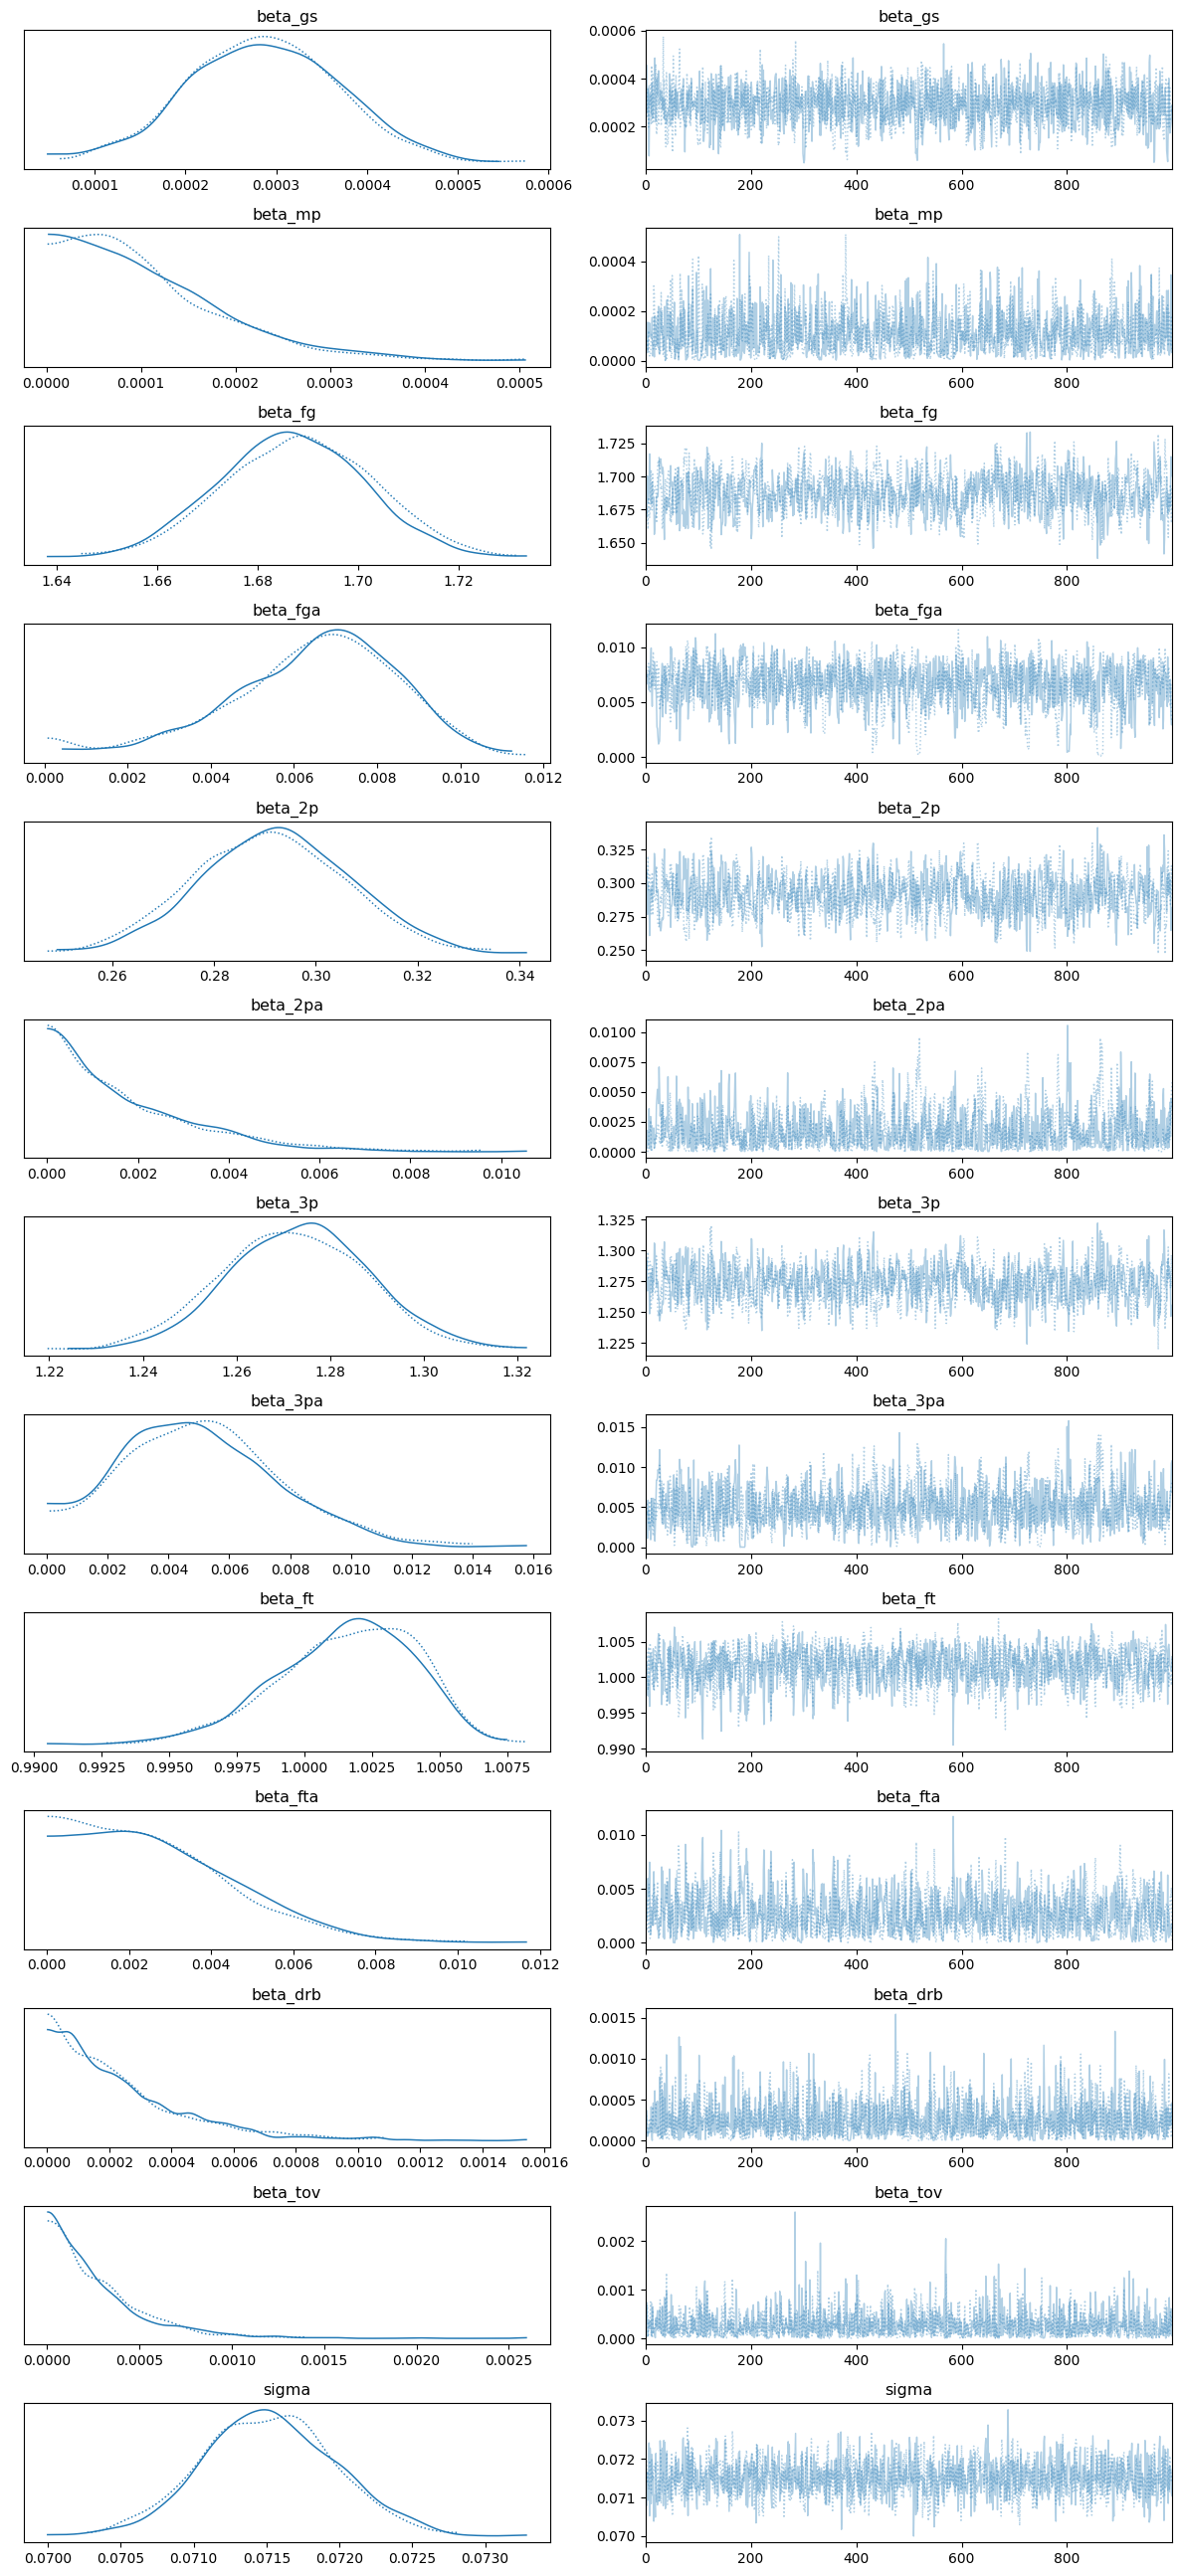

In [32]:
import arviz as az

# Trace plots
az.plot_trace(idata)
plt.tight_layout()

In [33]:
# Find max
with MLR:
    estimate = pm.find_MAP()




In [ ]:
# Generate out of sample prediction
to_pred = [[]]